## Programming for Data Analysis Project

**Francesco Troja**

***

#### An analysis of paleo-present climate data

>• Analyse CO2 vs Temperature Anomaly from 800kyrs – present;
>
>• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage);
>
>• Examine Irish context;
>
>• Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats;
>
>• For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis);
>
>• Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue;
>
>• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage).

## Contents

#### Introduction

This *project* aims to explore a critical subject regarding **CO2 and atmospheric carbon dioxide**. Multiple datasets will be utilized to offer a comprehensive view, including elements like global temperature and temperature anomalies worldwide. These datasets will play a crucial role in the analysis, providing insights into the complex interplay between CO2 levels and global climate factors.

The project will be divided into 3 parts. The first part will be focused on the Analyse of CO2 vs Temperature Anomaly from 800kyrs – present

the second part will take into consideration the Irish context

the third and last part will simulate global temperature anomaly over the next few decades.




#### Import Python Libraries


To execute this project, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:

- `pandas`: The library's powerful data structures, including DataFrames and Series, allowed for efficient organization and structuring of data, making it easy to perform various data operations, such as filtering, grouping, and aggregating.Pandas offered a wide range of functions for data cleaning and preparation, making it ideal for addressing real-world data challenges[1].
- `matplotlib.pyplot`: It is a widely used library for data visualization in Python. It provides a flexible and comprehensive set of tools to create various types of plots and charts. Its versatility allows to create bar charts, line plots, scatter plots, histograms, and more, making it an essential tool for exploratory data analysis and presentation of findings[2].
- `numpy`: It is imported in this context for its extensive capabilities in numerical and statistical operations. Numpy provides a wide range of probability distributions, functions for generating random numbers following these distributions, and tools for statistical calculations[3].
- `scipy.stats`: It includes an extensive array of statistical functionalities, covering various aspects of probability and data analysis. It includes a diverse set of probability distributions, facilitating the modeling of different random variables. Moreover, the module provides tools for generating summary and frequency statistics, allowing for a comprehensive understanding of dataset characteristics[4].
- `seaborn`: Seaborn is a powerful Python data visualization library based on Matplotlib. It is designed to work seamlessly with Pandas DataFrames and provides a high-level interface for drawing attractive and informative statistical graphics[5].

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Importing the Dataset

Dataset C02

In [109]:
# https://datatofish.com/excel-to-csv-python/
read_file = pd.read_excel (r'41586_2008_BFnature06949_MOESM31_ESM C02.xls', sheet_name='3.  Composite CO2')
read_file.to_csv (r'annual-CO2.csv', index = None, header=True)

In [110]:
# https://www.geeksforgeeks.org/convert-excel-to-csv-in-python/
df = pd.DataFrame(pd.read_csv("annual-CO2.csv"))


In [111]:
# https://www.geeksforgeeks.org/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/
dict = {'Composite CO2 record (0-800 kyr BP)': 'Year',
        'Unnamed: 1': 'CO2 (ppmv)'}
df.rename(columns=dict,
          inplace=True)

In [112]:
# https://sparkbyexamples.com/pandas/pandas-drop-first-row-of-dataframe/#:~:text=You%20can%20delete%2Fdrop%20the,%5B%5D%20and%20tail()%20methods
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df = df.iloc[6:].reset_index(drop=True)

Datset Tempeature

In [118]:
read_file = pd.read_excel (r'epicaDC.deuttemp.EDC3-AICC temperature.xls')
read_file.to_csv (r'temperature.csv', index = None, header=True)

In [119]:
df_temperature = pd.DataFrame(pd.read_csv("temperature.csv"))

#### Data Exploration for Dataset 1

In [114]:
df.head()

,Year,CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [115]:
print(f'The dimensions of the dataset are: {df.shape}')
print(f'The number of row are: {df.shape[0]}')
print (f'The number of Attributes are: {df.shape[1]}')

The dimensions of the dataset are: (1096, 2)
The number of row are: 1096
The number of Attributes are: 2


In [116]:
print('Find below the full summary of the Dataset:\n')
df.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1096 non-null   object
 1   CO2 (ppmv)  1096 non-null   object
dtypes: object(2)
memory usage: 17.2+ KB


In [128]:
# https://sparkbyexamples.com/pandas/pandas-change-column-data-type-dttype/#:~:text=astype()%20to%20Change%20Data,types%20to%20the%20same%20type.
# Change Type For One or Multiple Columns
df = df.astype({"Year": int, "CO2 (ppmv)": float})

In [129]:
print('The missing values are:')
df.isnull().sum()

The missing values are:


Year          0
CO2 (ppmv)    0
dtype: int64

In [130]:
print(f'The number of Duplicated Rows is: {df.duplicated().sum()}')


The number of Duplicated Rows is: 0


#### Data Exploration for Dataset 2

In [131]:
df_temperature.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [132]:
print(f'The dimensions of the dataset are: {df_temperature.shape}')
print(f'The number of row are: {df_temperature.shape[0]}')
print (f'The number of Attributes are: {df_temperature.shape[1]}')

The dimensions of the dataset are: (5819, 7)
The number of row are: 5819
The number of Attributes are: 7


In [133]:
print('Find below the full summary of the Dataset:\n')
df_temperature.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


In [135]:
print('The missing values are:')
df_temperature.isnull().sum()

The missing values are:


bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64

In [136]:
print(f'The number of Duplicated Rows is: {df_temperature.duplicated().sum()}')

The number of Duplicated Rows is: 0


#### Co2 levels over time

Text(0.5, 1.0, 'CO2 Levels over Time')

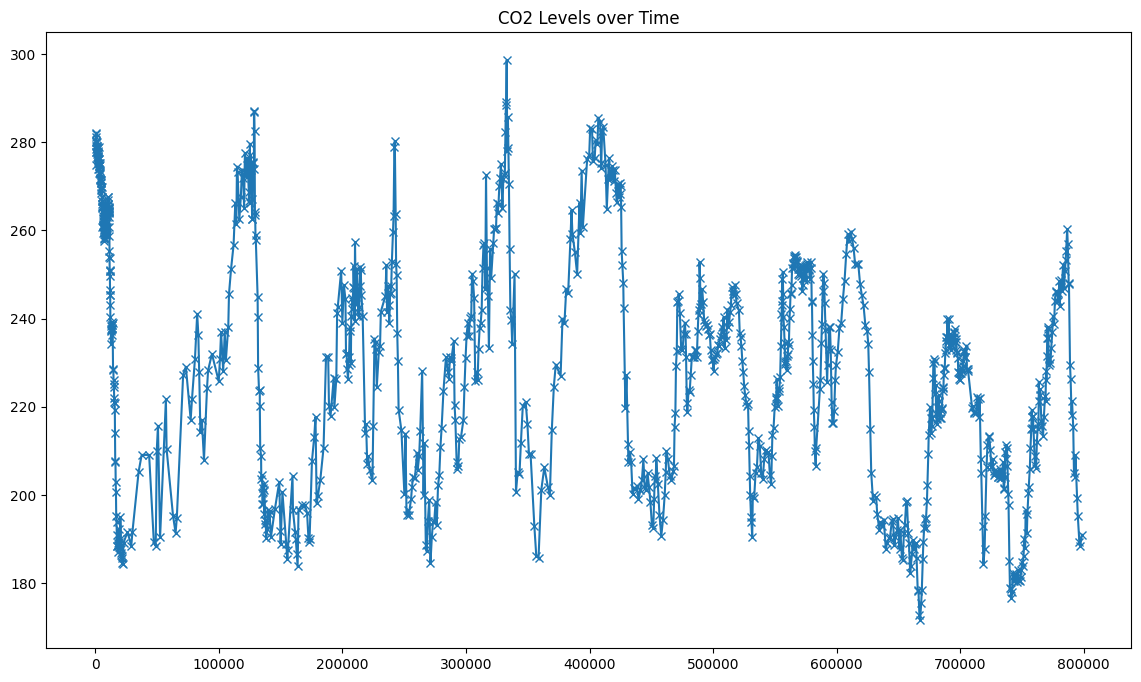

In [144]:
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['CO2 (ppmv)'], marker='x')
plt.title('CO2 Levels over Time')

#### temperature over time

In [145]:
df_temperature

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


Text(0.5, 1.0, 'Temperature over Time')

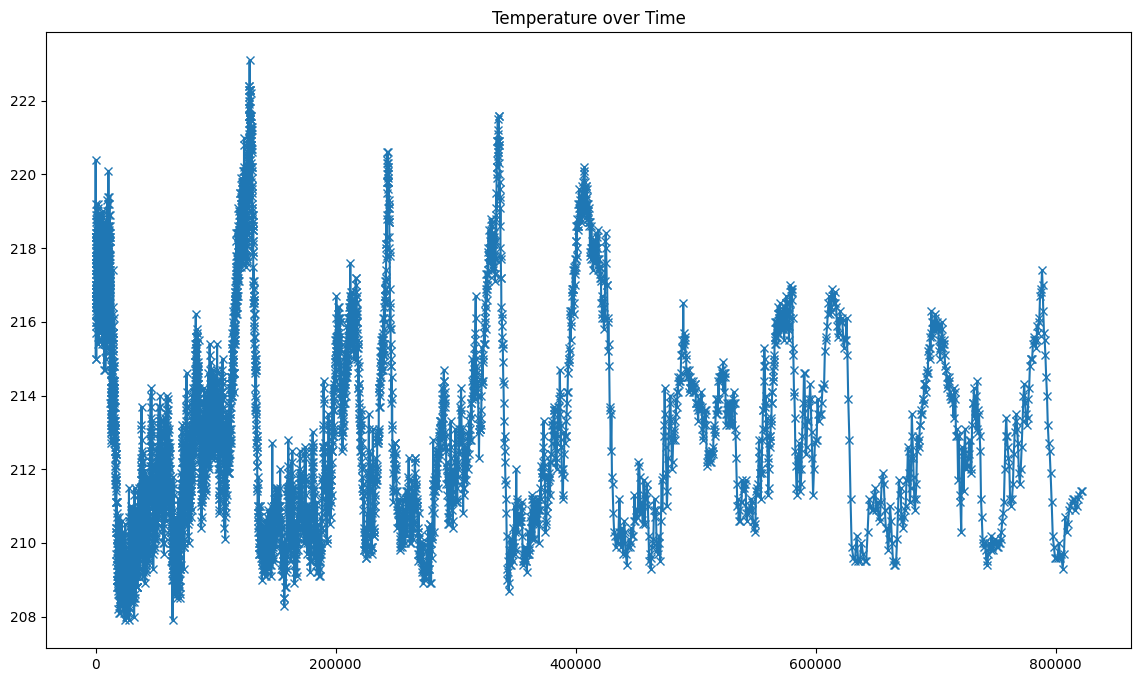

In [147]:
plt.figure(figsize=(14, 8))
plt.plot(df_temperature['AICC2012'], df_temperature['temp'], marker='x')
plt.title('Temperature over Time')

### References

[1]: Chugh v., [2023]. "Python pandas tutorial: The ultimate guide for beginners". [Datacamp](https://www.datacamp.com/tutorial/pandas)

[2]: matplotlib, [n.d.]. "matplotlib.pyplot". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

[3]: Zach, [2021]. "The Easiest Way to Use NumPy: import numpy as np". [Statology](https://www.statology.org/import-numpy-as-np/#:~:text=The%20import%20numpy%20portion%20of,function_name%20rather%20than%20numpy.)

[4]: Scipy, [n.d.]. "Statistical functions (scipy.stats)". [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

[5]: Seaborn, [n.d.]. "An introduction to seaborn". [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

***
End